In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [354]:
#import train dataset and test dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [355]:
#check head of train dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [356]:
#check head of test dataset
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [357]:
#check info for train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [358]:
#check info for test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [359]:
#check statistics of train ds
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Nicholson, Mr. Arthur Ernest",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [360]:
#now check for missing values in train 
#train_df.columns[train_df.isnull().any()].tolist()
train_df.isnull().sum()
#As per observation 3 columns Age, Cabin and Embarked have null values which needs to 
#be handled.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [361]:
#missing values in test_df
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [362]:
#average age of passengers survived
train_df['Age'].dropna()[train_df['Survived']==1].mean()

28.343689655172415

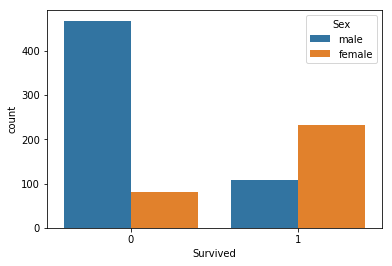

In [50]:
#gender wise analysis of survived passengers in train ds
#sns.barplot(x=train_df['Sex'],y=train_df[['Survived']].sum(axis=1))
sns.countplot(x='Survived',hue='Sex',data=train_df)


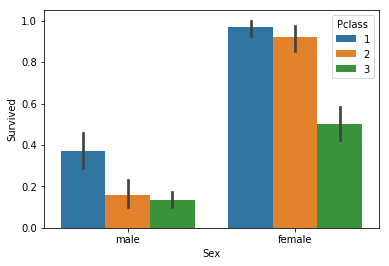

In [54]:
#Survival analysis as per Passenger class
#sns.countplot(x='Survived',hue='Pclass',data=train_df)
sns.barplot(x='Sex',y='Survived',hue='Pclass',data=train_df)
#Observation - more people were survived from class 1 as compared to lower class. 
#Also, survival rate of women was high as compared to men(considering women were given preference)

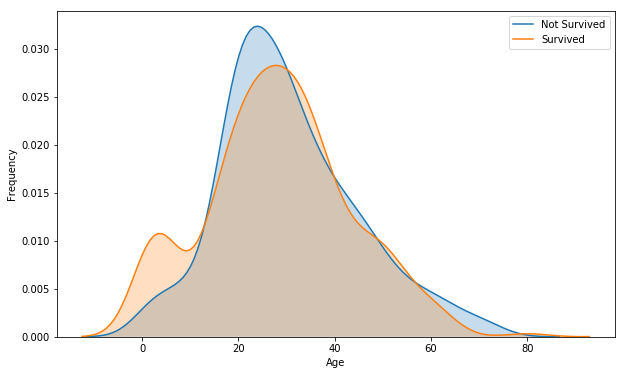

In [88]:
#Survival analysis as per Age
sns.set_context({"figure.figsize": (10, 6)})
g = sns.kdeplot(train_df['Age'][(train_df['Survived']==0) & (train_df['Age'].notnull())],shade=True)
g = sns.kdeplot(train_df['Age'][(train_df['Survived']==1) & (train_df['Age'] .notnull())]
                ,ax=g,shade=True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])
#from below plot, it seems that Young people(age 20-40) have more chances of survival.As 
#age increases, survival frequence decrease.People in age range 60-80 are less likely to survive.

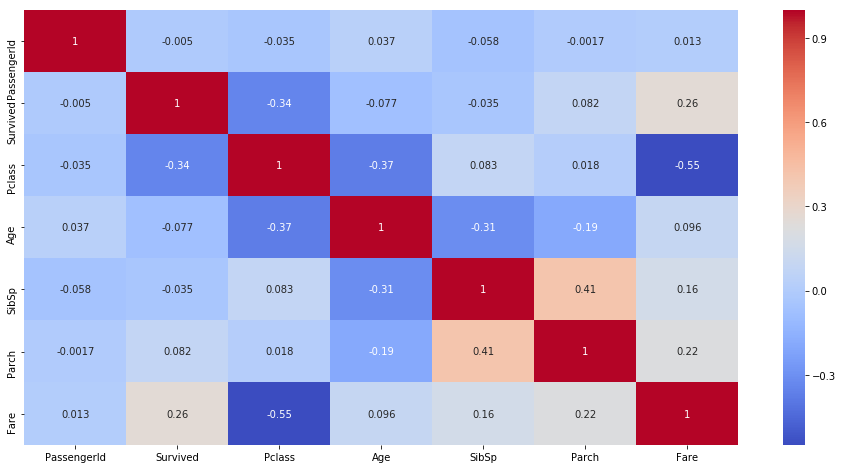

In [3]:
#lets see correlation in training data
fig,ax = plt.subplots(figsize=(16,8))
sns.heatmap(data=train_df.corr(),cmap='coolwarm',annot=True,ax=ax)


In [363]:
#Drop unnecessary columns - name,ticket & cabin as they certainly dont have any impact on predictions.
train_df = train_df.drop(['Name','Ticket','Cabin'],axis=1)
test_df = test_df.drop(['Name','Ticket','Cabin'],axis=1)

In [364]:
#Handle missing values now. Let's start with lowest number - Embarked
#Let's first check unique values of Embarked and their occurences
train_df['Embarked'].value_counts()
#From results we can see 'S' is the most occurred value for column Embarked.

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [365]:
#Let's fill missing values with 'S' in Embarked
train_df['Embarked'] = train_df['Embarked'].fillna("S")
test_df['Embarked'] = test_df['Embarked'].fillna("S")

In [366]:
#Now we need to fill missing values in Age column. Let's first check the Survived columns for missing ages.
train_df['Survived'][train_df['Age'].isnull()].value_counts()

0    125
1     52
Name: Survived, dtype: int64

In [367]:
#Lets fill missing Age with mean value of Age for Survived(1) and Not Survived(0)
mean_age_notsurvived = train_df['Age'][train_df['Survived']==0].dropna().mean()
mean_age_survived = train_df['Age'][train_df['Survived']==1].dropna().mean()
train_df['Age'][(train_df['Age'].isnull()) & (train_df['Survived']==0)] =  mean_age_notsurvived
train_df['Age'][(train_df['Age'].isnull()) & (train_df['Survived']==1)] =  mean_age_survived

c:\users\pareshbhatia\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\pareshbhatia\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [368]:
#lets do the same with test dataset
mean_age = test_df['Age'].dropna().mean()
test_df['Age'][test_df['Age'].isnull()] =  mean_age


c:\users\pareshbhatia\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [369]:
mean_fare = test_df['Fare'].dropna().mean()
test_df['Fare'][test_df['Fare'].isnull()] = mean_fare

c:\users\pareshbhatia\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [370]:
#convert categorical column Sex to numerical values.
# train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
# test_df['Sex'] = test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
# train_df['Sex'][train_df['Sex']=='female'] = 1
# train_df['Sex'][train_df['Sex']=='male'] = 0
# test_df['Sex'][test_df['Sex']=='female'] = 1
# test_df['Sex'][test_df['Sex']=='male'] = 0
train_df['Sex'] = train_df['Sex'].map({'female': 1,'male':0})
test_df['Sex'] = test_df['Sex'].map({'female': 1,'male':0})




In [371]:
#Lets convert the categorical feature Embarked to numerical
train_df['Embarked'] = train_df['Embarked'].map({'S':0,'Q':1,'C':2})
test_df['Embarked'] = test_df['Embarked'].map({'S':0,'Q':1,'C':2})

In [372]:
#Lets start with importing models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict

In [373]:
#do train test split
X = train_df.drop('Survived',axis=1)
y = train_df['Survived']
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [319]:
#Logistic regression
# lr = LogisticRegression()
# lr.fit(X_train,y_train)
#lr_pred = lr.predict(X_test)
#lr_score = lr.score(X_test,y_test)
#print('accuracy :',lr_score)
#accuracy with train_test_split - 0.80597014925373134
#lr_score = cross_val_score(lr,X,y,cv=10)
#lr_pred = lr.predict(X_test)
#lr_pred = cross_val_predict(lr,X,y,cv=10)
#print('accuracy :',lr_score.mean())
#accuracy with 5 fold cross validation - 0.805774500768

accuracy : 0.796912098513


In [314]:
#KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train,y_train)
#knn_score = knn.score(X_test,y_test)
#print('accuracy :',knn_score)
#accuracy with train_test_split - 0.66044776119402981
knn_score = cross_val_score(knn,X,y,cv=10) 
#print('accuracy :',knn_score)
print('accuracy :',knn_score.mean())
knn_pred = cross_val_predict(knn,X,y,cv=10)


accuracy : 0.565646634888


In [313]:
#Support vector machine
svc = SVC()
svc.fit(X_train,y_train)
# svc_pred = svc.predict(X_test)
# svc_score = svc.score(X_test,y_test)
# print('accuracy :',svc_score)
svc_score = cross_val_score(svc,X,y,cv=10)
print('accuracy :',svc_score.mean())
svc_pred = cross_val_predict(svc,X,y,cv=10)
#accuracy with train_test_split - 0.59328358208955223

accuracy : 0.61614515946


In [312]:
#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
# dt_pred = dt.predict(X_test)
# dt_score = dt.score(X_test,y_test)
# print('accuracy :',dt_score)
#accuracy with train_test_split - 0.77985074626865669
dt_score = cross_val_score(dt,X,y,cv=10)
print('accuracy :',dt_score.mean())
dt_pred  = cross_val_predict(dt,X,y,cv=10)


accuracy : 0.799183974577


In [376]:
#Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
# rf_pred = rf.predict(X_test)
# rf_score = rf.score(X_test,y_test)
# print('accuracy :',rf_score)
#accuracy with train_test_split - 0.82835820895522383
rf_score = cross_val_score(rf,X,y,cv=10)
print('accuracy :',rf_score.mean())
#test_df['Survived'] = rf.predict(test_df)
# output = test_df[['PassengerId','Survived']]
# output.to_csv('output.csv',index=False)


accuracy : 0.84070763818
